In [1]:
from one import model
from one import algorithm
from one import method
import one as mcsp

In [2]:
import uuid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [3]:
model.Heisenberg.Heisenberg

In [3]:
m = mcsp.SKmodel(20)
f = mcsp.Metropolis(m)

In [9]:
uid =f.equil_sample(2.7,max_iter=10000)

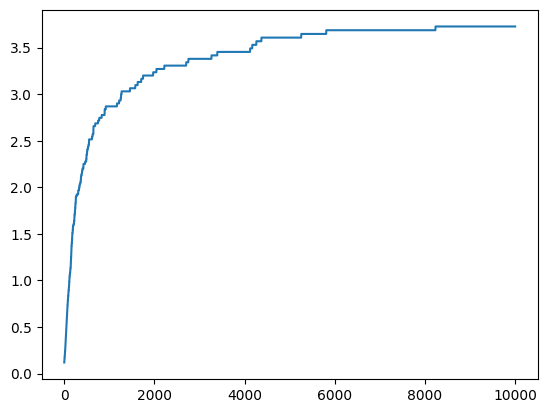

In [10]:
plt.plot(f.get_energy(uid))
